In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt
from datetime import datetime,timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

Text(0.5, 0, 'Date')

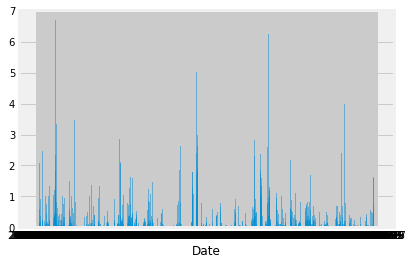

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last12_precipitation = session.query(Measurement).\
    filter(Measurement.date > '2016-08-23')

# print(f"{last12_precipitation} counts")

last12_precipitation_df=pd.read_sql(last12_precipitation.statement,engine)
last12_precipitation_df.head()

plt.bar(last12_precipitation_df['date'].values, last12_precipitation_df['prcp'].values, align='center', alpha=0.5)
plt.xlabel('Date')

2017-08-23
2016-08-23


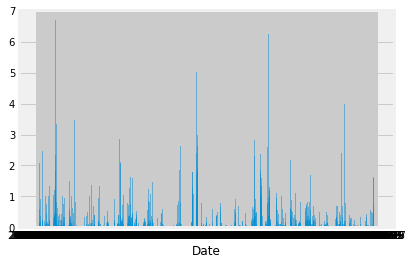

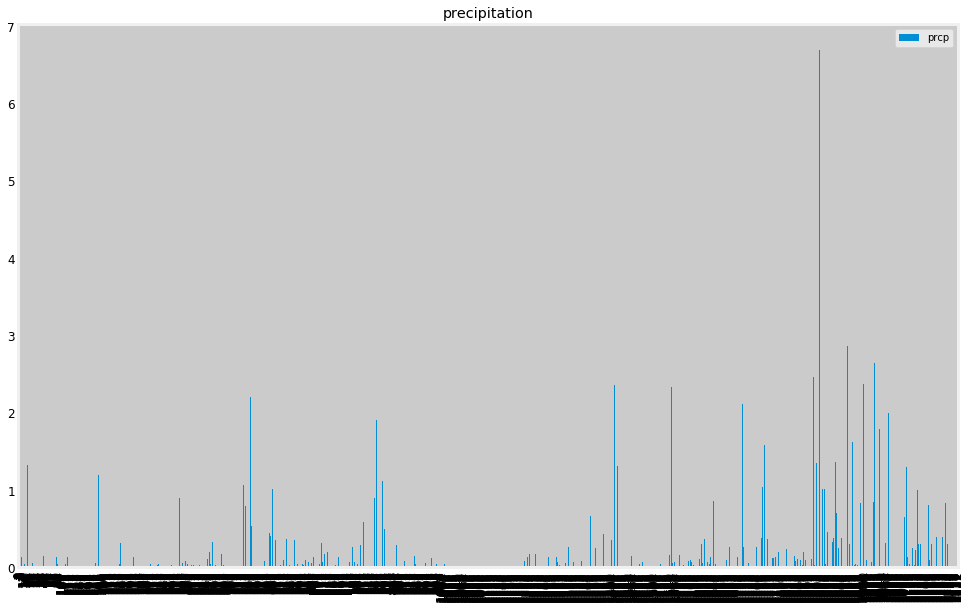

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last12_precipitation = session.query(Measurement).\
    filter(Measurement.date > '2016-08-23')

# print(f"{last12_precipitation} counts")

last12_precipitation_df=pd.read_sql(last12_precipitation.statement,engine)
last12_precipitation_df.head()

# ax=df[['date','prcp']].plot(kind='bar',title='precipitation', figsize= (15,10),legend=True, fontsize=12)

last12_precipitation_df=pd.read_sql(last12_precipitation.statement,engine)
last12_precipitation_df.head()

plt.bar(last12_precipitation_df['date'].values, last12_precipitation_df['prcp'].values, align='center', alpha=0.5)
plt.xlabel('Date')




# Calculate the date 1 year ago from the last data point in the database


date= last12_precipitation_df['date'].iloc[-1]
print(date)
start_time = dt.date(2017,8,23) - dt.timedelta(days=365)
print(start_time)

# Perform a query to retrieve the data and precipitation scores

last12_precipitation = session.query(Measurement).\
    filter(Measurement.date == start_time) 



# Save the query results as a Pandas DataFrame and set the index to the date column
# df=pd.DataFrame(last12_precipitation, columns = ['date','preciptation'])
# df.head()

df=pd.read_sql(last12_precipitation.statement,engine)
df.head()

# Sort the dataframe by date

last12_precipitation_df.sort_values(by=['date'])
last12_precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data
ax=last12_precipitation_df[['date','prcp']].plot(kind='bar',title='precipitation', figsize= (15,10),legend=True, fontsize=12)

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

last12_precipitation_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
print(stations)



9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
M_query=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)


Measurement_df = pd.read_sql(M_query.statement,engine)
Measurement_iloc= Measurement_df.iloc[0]
Measurement_df.head()
# print(Measurement_iloc['station'])



# List the stations and the counts in descending order.
sorted_measurment= Measurement_df.sort_values(by ='count_1', ascending=False)

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Measurement_df.describe()

,count_1
count,9.000000
mean,2172.222222
std,777.073963
min,511.000000
25%,1979.000000
50%,2612.000000
75%,2709.000000
max,2772.000000


USC00519281


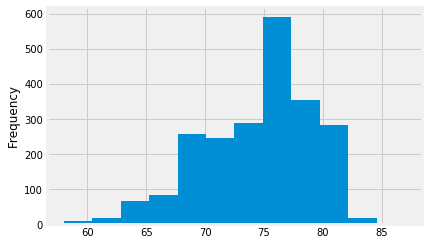

In [16]:
# Choose the station with the highest number of temperature observations.
high_station= sorted_measurment['station'].iloc[0]
filter=last12_precipitation_df['station']== high_station 
print (high_station)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#convert column to datetime
#turn the datetime to an index
last12_precipitation_df.index = last12_precipitation_df['tobs']
last12_precipitation_df = last12_precipitation_df.sort_index()
#Plot
last12_precipitation_df['tobs'].plot(kind='hist',bins=12)
# plot_hist.hist(column ='tobs')(bins=12, alpha=0.5)
plt.show()


plot_hist= last12_precipitation_df.filter(like=high_station)



![precipitation](Images/station-histogram.png)

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


min_temp,avg_temp,max_temp = calc_temps('2016-08-23', '2017-08-23')[0]
print(min_temp,avg_temp,max_temp)

58.0 74.59058295964125 87.0


/Users/akashchhabra/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


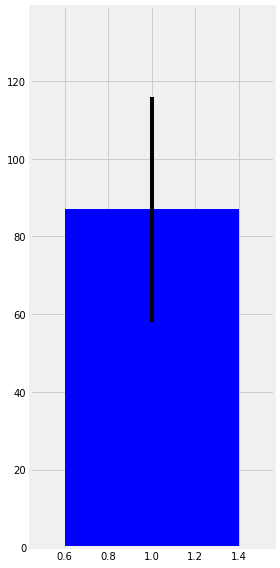

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig,ax = plt.subplots(figsize=plt.figaspect(2.))
xposition = 1
yerr = max_temp - min_temp

bar=ax.bar(xposition, max_temp,yerr=yerr, align= 'center', color = 'blue')
ax.margins(.2,.2)
fig.tight_layout()
fig.show()

In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
beg_date = '2016-08-23'
end_date = '2017-08-23'

results = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                       filter(Measurement.station == Station.station).\
                       filter(Measurement.date >= beg_date).\
                       filter(Measurement.date <= end_date).\
                       group_by(Station.name).\
                       order_by(func.sum(Measurement.prcp).desc()).all()
print(results)



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 147.81000000000006), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 70.03000000000003), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 48.510000000000026), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 38.01), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 33.239999999999995), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 16.089999999999986), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.59)]


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
